# Fill Missing Values as Unknown

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def import_dataset(filename):
    bank_mkt = pd.read_csv(filename,
                           na_values=["unknown", "nonexistent"],
                           true_values=["yes", "success"],
                           false_values=["no", "failure"])
    # Treat pdays = 999 as missing values
    bank_mkt["pdays"] = bank_mkt["pdays"].replace(999, np.nan)
    # Convert types, "Int64" is nullable integer data type in pandas
    bank_mkt = bank_mkt.astype(dtype={"age": "Int64",
                                      "job": "category",
                                      "marital": "category",
                                      "education": "category",
                                      "default": "boolean",
                                      "housing": "boolean",
                                      "loan": "boolean",
                                      "contact": "category",
                                      "month": "category",
                                      "day_of_week": "category",
                                      "duration": "Int64",
                                      "campaign": "Int64",
                                      "pdays": "Int64",
                                      "previous": "Int64",
                                      "poutcome": "boolean",
                                      "y": "boolean"})
    return bank_mkt

In [3]:
def fill_unknown(df, feature_list):
    df = df.copy()
    for feature in feature_list:
        if pd.api.types.is_categorical_dtype(df[feature]):
            df[feature] = df[feature].cat.add_categories("unknown")
            df[feature] = df[feature].fillna("unknown")
        elif pd.api.types.is_bool_dtype(bank_mkt[feature]):
            df[feature] = df[feature].astype("category")
            df[feature] = df[feature].cat.add_categories("unknown")
            df[feature] = df[feature].fillna("unknown")
    return df

In [4]:
bank_mkt = import_dataset("../data/BankMarketing.csv")
category_list = ["marital", "education", "default", "job", "housing", "loan"]
bank_mkt = fill_unknown(bank_mkt, category_list)
bank_mkt["pdays"] = bank_mkt["pdays"].fillna(999)
bank_mkt["poutcome"] = bank_mkt["poutcome"].fillna(False)

In [5]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
stand_scaler = preprocessing.StandardScaler()
data = bank_mkt[["age", "campaign", "previous", "pdays", "emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m", "nr.employed"]] 
data = min_max_scaler.fit_transform(data)
bank_mkt[["age", "campaign", "previous", "pdays", "emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m", "nr.employed"]] = data

In [6]:
bank_x = bank_mkt.drop(["duration", "y"], axis=1)
bank_x = pd.get_dummies(bank_x, drop_first=True)
bank_y = bank_mkt["y"].astype(int)

0.8506919155134741 0.3249176728869374


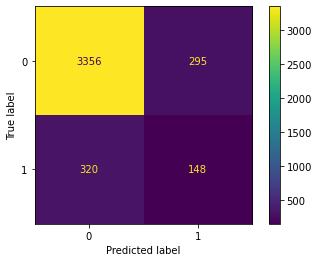

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(bank_x, bank_y, test_size = 0.1)

from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(class_weight='balanced')

from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
tree_fit = tree_clf.fit(X_train, Y_train)
Y_test_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
print(accuracy, f1)
plot_confusion_matrix(tree_clf, X_test, Y_test)

0.8242291818402525 0.43348982785602497


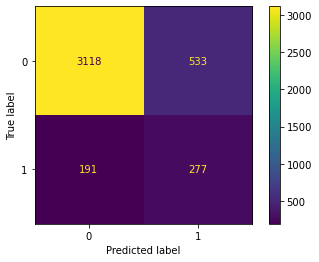

In [8]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_fit = nb_model.fit(X_train, Y_train)
Y_test_pred = nb_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
print(accuracy, f1)
plot_confusion_matrix(nb_model, X_test, Y_test)

0.8943918426802622 0.3794579172610556


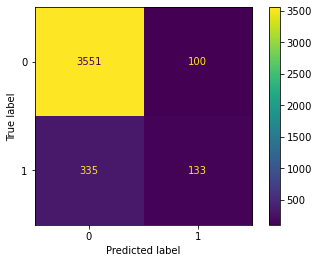

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf = rf_clf.fit(X_train, Y_train)
Y_test_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
print(accuracy, f1)
plot_confusion_matrix(rf_clf, X_test, Y_test)